Business Intelligence Project    
Name: Zehra Ahmed, Farah Inayat, Kisa Fatima, Zuha Aqib    
Date: 31-May-2025

In [29]:
# print when the last code was run
from datetime import datetime
datetime.now().strftime("%Y-%m-%d %H:%M:%S")

'2025-06-02 03:11:22'

In [30]:
# Capture start time
start_time = datetime.now()

# Imports

In [31]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Function to get current date and time as a string
def get_current_datetime():
    return datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Data Loading

In [33]:
# Load the dataset
df = pd.read_csv('../data/flights_jantojun2020_3M_cleaned.csv')

pd.set_option('display.max_columns', None)

In [34]:
df

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,day_of_week_c,FLIGHT_DATE,MARKETING_CARRIER_CODE,MARKETING_FLIGHT_NUMBER,AIRCRAFT_TAIL_NUMBER,ORIGIN_AIRPORT_CODE,ORIGIN_CITY_NAME,ORIGIN_STATE_CODE,ORIGIN_STATE_NAME,DEST_AIRPORT_CODE,DEST_CITY_NAME,DEST_STATE_CODE,DEST_STATE_NAME,SCHEDULED_DEP_TIME,SCHEDULED_DEP_HOUR,ACTUAL_DEP_TIME,ACTUAL_DEP_HOUR,DEP_DELAY,DEP_DELAY_15_MIN,DEP_DELAY_GROUP,ORIGIN_TAXI_TIME,DEP_TAKEOFF_TIME,ARR_LANDING_TIME,DEST_TAXI_TIME,SCHEDULED_ARR_TIME,SCHEDULED_ARR_HOUR,ACTUAL_ARR_TIME,ACTUAL_ARR_HOUR,ARR_DELAY,ARR_DELAY_15_MIN,ARR_DELAY_GROUP,CANCELLED,cancelled_c,CANCELLATION_REASON,SCHEDULED_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,IN_AIR_DURATION,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,1,3,Wed,2020-01-01,WN,5888,N951WN,ONT,"Ontario, CA",CA,California,SFO,"San Francisco, CA",CA,California,1810,18,1851,18,41,Greater than 15,30-45 min late,44,1935,2049,4,1945,19,2053,20,68,Greater than 15,60-75 min late,0,No,Not Cancelled,95,122,74,363,500-750 miles,8,0,27,0,33
1,1,1,3,Wed,2020-01-01,WN,6276,N467WN,ONT,"Ontario, CA",CA,California,SFO,"San Francisco, CA",CA,California,1150,11,1146,11,-4,Less than 15,0-15 min early,13,1159,1310,8,1320,13,1318,13,-2,Less than 15,0-15 min early,0,No,Not Cancelled,90,92,71,363,500-750 miles,0,0,0,0,0
2,1,1,3,Wed,2020-01-01,WN,4598,N7885A,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,2020,20,2016,20,-4,Less than 15,0-15 min early,8,2024,2121,3,2130,21,2124,21,-6,Less than 15,0-15 min early,0,No,Not Cancelled,70,68,57,333,500-750 miles,0,0,0,0,0
3,1,1,3,Wed,2020-01-01,WN,4761,N551WN,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,1340,13,1350,13,10,Less than 15,0-15 min late,10,1400,1503,2,1455,14,1505,15,10,Less than 15,0-15 min late,0,No,Not Cancelled,75,75,63,333,500-750 miles,0,0,0,0,0
4,1,1,3,Wed,2020-01-01,WN,5162,N968WN,ONT,"Ontario, CA",CA,California,SJC,"San Jose, CA",CA,California,915,9,916,9,1,Less than 15,0-15 min late,6,922,1019,4,1035,10,1023,10,-12,Less than 15,0-15 min early,0,No,Not Cancelled,80,67,57,333,500-750 miles,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745842,6,13,6,Sat,2020-06-13,AS,1209,N413AS,SEA,"Seattle, WA",WA,Washington,HNL,"Honolulu, HI",HI,Hawaii,1050,10,1048,10,-2,Less than 15,0-15 min early,10,1058,1327,3,1405,14,1330,13,-35,Less than 15,30-45 min early,0,No,Not Cancelled,375,342,329,2677,2750-3000 miles,0,0,0,0,0
2745843,6,13,6,Sat,2020-06-13,AS,1216,N929VA,PHX,"Phoenix, AZ",AZ,Arizona,SEA,"Seattle, WA",WA,Washington,1530,15,1517,15,-13,Less than 15,0-15 min early,20,1537,1802,5,1826,18,1807,18,-19,Less than 15,15-30 min early,0,No,Not Cancelled,176,170,145,1107,1250-1500 miles,0,0,0,0,0
2745844,6,13,6,Sat,2020-06-13,AS,1217,N929VA,SEA,"Seattle, WA",WA,Washington,PHX,"Phoenix, AZ",AZ,Arizona,1100,11,1058,10,-2,Less than 15,0-15 min early,18,1116,1350,3,1405,14,1353,13,-12,Less than 15,0-15 min early,0,No,Not Cancelled,185,175,154,1107,1250-1500 miles,0,0,0,0,0
2745845,6,13,6,Sat,2020-06-13,AS,1223,N841VA,SNA,"Santa Ana, CA",CA,California,SEA,"Seattle, WA",WA,Washington,1510,15,1459,14,-11,Less than 15,0-15 min early,14,1513,1738,5,1755,17,1743,17,-12,Less than 15,0-15 min early,0,No,Not Cancelled,165,164,145,978,1000-1250 miles,0,0,0,0,0


In [35]:
df.dtypes

MONTH                       int64
DAY_OF_MONTH                int64
DAY_OF_WEEK                 int64
day_of_week_c              object
FLIGHT_DATE                object
MARKETING_CARRIER_CODE     object
MARKETING_FLIGHT_NUMBER     int64
AIRCRAFT_TAIL_NUMBER       object
ORIGIN_AIRPORT_CODE        object
ORIGIN_CITY_NAME           object
ORIGIN_STATE_CODE          object
ORIGIN_STATE_NAME          object
DEST_AIRPORT_CODE          object
DEST_CITY_NAME             object
DEST_STATE_CODE            object
DEST_STATE_NAME            object
SCHEDULED_DEP_TIME          int64
SCHEDULED_DEP_HOUR          int64
ACTUAL_DEP_TIME             int64
ACTUAL_DEP_HOUR             int64
DEP_DELAY                   int64
DEP_DELAY_15_MIN           object
DEP_DELAY_GROUP            object
ORIGIN_TAXI_TIME            int64
DEP_TAKEOFF_TIME            int64
ARR_LANDING_TIME            int64
DEST_TAXI_TIME              int64
SCHEDULED_ARR_TIME          int64
SCHEDULED_ARR_HOUR          int64
ACTUAL_ARR_TIM

In [36]:
df.shape

(2745847, 47)

# PRE TESTING

In [37]:
# Identify numerical and categorical columns
numerical_cols   = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()

print(f"Detected {len(numerical_cols)} numerical columns: {numerical_cols}")
print(f"\nDetected {len(categorical_cols)} categorical columns: {categorical_cols}\n")

Detected 28 numerical columns: ['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MARKETING_FLIGHT_NUMBER', 'SCHEDULED_DEP_TIME', 'SCHEDULED_DEP_HOUR', 'ACTUAL_DEP_TIME', 'ACTUAL_DEP_HOUR', 'DEP_DELAY', 'ORIGIN_TAXI_TIME', 'DEP_TAKEOFF_TIME', 'ARR_LANDING_TIME', 'DEST_TAXI_TIME', 'SCHEDULED_ARR_TIME', 'SCHEDULED_ARR_HOUR', 'ACTUAL_ARR_TIME', 'ACTUAL_ARR_HOUR', 'ARR_DELAY', 'CANCELLED', 'SCHEDULED_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'IN_AIR_DURATION', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

Detected 19 categorical columns: ['day_of_week_c', 'FLIGHT_DATE', 'MARKETING_CARRIER_CODE', 'AIRCRAFT_TAIL_NUMBER', 'ORIGIN_AIRPORT_CODE', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_CODE', 'ORIGIN_STATE_NAME', 'DEST_AIRPORT_CODE', 'DEST_CITY_NAME', 'DEST_STATE_CODE', 'DEST_STATE_NAME', 'DEP_DELAY_15_MIN', 'DEP_DELAY_GROUP', 'ARR_DELAY_15_MIN', 'ARR_DELAY_GROUP', 'cancelled_c', 'CANCELLATION_REASON', 'DISTANCE_GROUP']



In [38]:
# For detailed CSV output
csv_results = []  # each entry: [Column A, Column B, Test Name, Result, Inference]

# For summary TXT output
normal_columns     = []
non_normal_columns = []
outlier_columns    = []
strong_corr_pairs  = []
chi_assoc_pairs    = []

# NORMALITY TESTING

In [39]:
print("=== 1. Normality Testing (Shapiro–Wilk with subsample) ===\n")

# Define max sample size for Shapiro–Wilk
MAX_SW_SAMPLE = 5000

for col in numerical_cols:
    # Drop NA and get the non‐null values
    data_full = df[col].dropna()
    n_full = len(data_full)
    if n_full < 3:
        print(f"• {col}: only {n_full} non‐NA rows, skipping normality test.")
        continue

    # If more than MAX_SW_SAMPLE, take a random subsample of size MAX_SW_SAMPLE
    if n_full > MAX_SW_SAMPLE:
        data = data_full.sample(n=MAX_SW_SAMPLE, random_state=42).values
        used_n = MAX_SW_SAMPLE
        note = f"(used random subsample of {MAX_SW_SAMPLE}/{n_full})"
    else:
        data = data_full.values
        used_n = n_full
        note = f"(using full {n_full})"

    # Now run Shapiro–Wilk on data (length ≤ 5000)
    stat, p_value = stats.shapiro(data)
    if p_value > 0.05:
        inference = "Normally distributed"
        normal_columns.append(col)
    else:
        inference = "Not normally distributed"
        non_normal_columns.append(col)

    result_str = f"statistic={stat:.4f}, p={p_value:.4f}, n={used_n} {note}"
    # print(f"• {col}: p = {p_value:.4f} → {inference} {note}")
    csv_results.append([col, "", "Shapiro-Wilk", result_str, inference])

    # —– ALTERNATIVE (D’Agostino’s K²) on full data: uncomment if you prefer 
    # k2, p2 = stats.normaltest(data_full)
    # inf2 = "Normally distributed" if p2 > 0.05 else "Not normally distributed"
    # result2 = f"statistic={k2:.4f}, p={p2:.4f}, n={n_full}"
    # print(f"   (D’Agostino K²) → p = {p2:.4f} → {inf2} (n={n_full})")
    # csv_results.append([col, "", "Normaltest (D’Agostino)", result2, inf2])

print("\nNormal columns    :", ", ".join(normal_columns)     if normal_columns     else "None")
print("Non-normal columns:", ", ".join(non_normal_columns) if non_normal_columns else "None")
print("\n")

=== 1. Normality Testing (Shapiro–Wilk with subsample) ===


Normal columns    : None
Non-normal columns: MONTH, DAY_OF_MONTH, DAY_OF_WEEK, MARKETING_FLIGHT_NUMBER, SCHEDULED_DEP_TIME, SCHEDULED_DEP_HOUR, ACTUAL_DEP_TIME, ACTUAL_DEP_HOUR, DEP_DELAY, ORIGIN_TAXI_TIME, DEP_TAKEOFF_TIME, ARR_LANDING_TIME, DEST_TAXI_TIME, SCHEDULED_ARR_TIME, SCHEDULED_ARR_HOUR, ACTUAL_ARR_TIME, ACTUAL_ARR_HOUR, ARR_DELAY, CANCELLED, SCHEDULED_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, IN_AIR_DURATION, DISTANCE, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY




# OUTLIER TESTING

In [40]:
print("=== 2. Outlier Detection (Z-Score Method) ===\n")
for col in numerical_cols:
    col_data = df[col].dropna()
    z_scores = np.abs(stats.zscore(col_data))
    num_outliers = (z_scores > 3).sum()
    if num_outliers > 0:
        inference = f"{num_outliers} outlier(s) present"
        outlier_columns.append(col)
    else:
        inference = "No significant outliers"
    result_str = f"num_outliers={num_outliers}"
    
    # print(f"• {col}: {num_outliers} outlier(s) → {inference}")
    csv_results.append([col, "", "Z-Score Outlier", result_str, inference])
print("\n► Columns with outliers:", ", ".join(outlier_columns) if outlier_columns else "None")
print("\n")

=== 2. Outlier Detection (Z-Score Method) ===


► Columns with outliers: MARKETING_FLIGHT_NUMBER, ORIGIN_TAXI_TIME, DEST_TAXI_TIME, SCHEDULED_ELAPSED_TIME, ACTUAL_ELAPSED_TIME, IN_AIR_DURATION, DISTANCE, CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY




# CORRELATION TESTING

In [41]:
print("=== 3. Correlation Analysis (Pearson) ===\n")
corr_matrix = df[numerical_cols].corr()

for i in range(len(numerical_cols)):
    for j in range(i+1, len(numerical_cols)):
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]
        r_value = corr_matrix.loc[col1, col2]
        
        if abs(r_value) > 0.85:
            strength = "Strong correlation"
            strong_corr_pairs.append(f"{col1} & {col2} (r={r_value:.4f})")
        elif abs(r_value) > 0.5:
            strength = "Moderate correlation"
        else:
            strength = "Weak correlation"
        
        result_str = f"r={r_value:.4f}"
        # print(f"• {col1} vs {col2}: r = {r_value:.4f} → {strength}")
        csv_results.append([col1, col2, "Pearson Correlation", result_str, strength])
print("\n► Strongly correlated pairs:", ", ".join(strong_corr_pairs) if strong_corr_pairs else "None")
print("\n")

=== 3. Correlation Analysis (Pearson) ===


► Strongly correlated pairs: SCHEDULED_DEP_TIME & SCHEDULED_DEP_HOUR (r=0.9993), ACTUAL_DEP_TIME & ACTUAL_DEP_HOUR (r=0.9994), ACTUAL_DEP_TIME & DEP_TAKEOFF_TIME (r=0.9892), ACTUAL_DEP_TIME & ARR_LANDING_TIME (r=0.8539), ACTUAL_DEP_HOUR & DEP_TAKEOFF_TIME (r=0.9887), ACTUAL_DEP_HOUR & ARR_LANDING_TIME (r=0.8569), DEP_DELAY & ARR_DELAY (r=0.9969), DEP_DELAY & CANCELLED (r=0.9981), DEP_TAKEOFF_TIME & ARR_LANDING_TIME (r=0.8623), ARR_LANDING_TIME & ACTUAL_ARR_TIME (r=0.9833), ARR_LANDING_TIME & ACTUAL_ARR_HOUR (r=0.9833), SCHEDULED_ARR_TIME & SCHEDULED_ARR_HOUR (r=0.9994), ACTUAL_ARR_TIME & ACTUAL_ARR_HOUR (r=0.9994), ARR_DELAY & CANCELLED (r=0.9987), SCHEDULED_ELAPSED_TIME & DISTANCE (r=0.9769), ACTUAL_ELAPSED_TIME & IN_AIR_DURATION (r=0.9883)




# CHI SQUARE

In [42]:
print("=== 4. Chi-Square Tests (Categorical vs Categorical, Subsampled) ===\n")
MAX_CS_SAMPLE = 5000

print(len(categorical_cols)*len(categorical_cols))
count = 0

for col1 in categorical_cols:
    for col2 in categorical_cols:
        print(count)
        count+=1
        if col1 == col2:
            continue

        # Keep only rows where both columns are non-null
        sub = df[[col1, col2]].dropna()
        n_sub = len(sub)
        if n_sub < 2:
            print(f"• {col1} vs {col2}: too few non‐NA rows ({n_sub}), skipping.")
            continue

        # If more than MAX_CS_SAMPLE, sample down:
        if n_sub > MAX_CS_SAMPLE:
            sub = sub.sample(n=MAX_CS_SAMPLE, random_state=42)
            note = f"(sampled {MAX_CS_SAMPLE}/{n_sub})"
        else:
            note = f"(using full {n_sub})"

        # Build crosstab and run Chi‐Square
        try:
            ctab     = pd.crosstab(sub[col1], sub[col2])
            chi2, p_val, dof, expected = stats.chi2_contingency(ctab)

            if p_val < 0.05:
                inference = "Associated (p < 0.05)"
                chi_assoc_pairs.append(f"{col1} & {col2} (p={p_val:.4f})")
            else:
                inference = "Independent (p ≥ 0.05)"

            result_str = f"chi2={chi2:.4f}, p={p_val:.4f}, dof={dof}, n={len(sub)} {note}"
            print(f"• {col1} vs {col2}: p = {p_val:.4f} → {inference} {note}")
            csv_results.append([col1, col2, "Chi-Square Test", result_str, inference])

        except Exception as e:
            print(f"• {col1} vs {col2}: skipped (error: {e})")

print("\n► Highly associated categorical pairs:", 
      ", ".join(chi_assoc_pairs) if chi_assoc_pairs else "None")
print("\n")

=== 4. Chi-Square Tests (Categorical vs Categorical, Subsampled) ===

361
0
1
• day_of_week_c vs FLIGHT_DATE: p = 0.0000 → Associated (p < 0.05) (sampled 5000/2745847)
2
• day_of_week_c vs MARKETING_CARRIER_CODE: p = 0.4050 → Independent (p ≥ 0.05) (sampled 5000/2745847)
3
• day_of_week_c vs AIRCRAFT_TAIL_NUMBER: p = 0.4171 → Independent (p ≥ 0.05) (sampled 5000/2745847)
4
• day_of_week_c vs ORIGIN_AIRPORT_CODE: p = 0.5367 → Independent (p ≥ 0.05) (sampled 5000/2745847)
5
• day_of_week_c vs ORIGIN_CITY_NAME: p = 0.4733 → Independent (p ≥ 0.05) (sampled 5000/2745847)
6
• day_of_week_c vs ORIGIN_STATE_CODE: p = 0.4628 → Independent (p ≥ 0.05) (sampled 5000/2745847)
7
• day_of_week_c vs ORIGIN_STATE_NAME: p = 0.4628 → Independent (p ≥ 0.05) (sampled 5000/2745847)
8
• day_of_week_c vs DEST_AIRPORT_CODE: p = 0.1876 → Independent (p ≥ 0.05) (sampled 5000/2745847)
9
• day_of_week_c vs DEST_CITY_NAME: p = 0.1975 → Independent (p ≥ 0.05) (sampled 5000/2745847)
10
• day_of_week_c vs DEST_STATE_C

# HEATMAP

=== 5. Displaying Correlation Heatmap ===



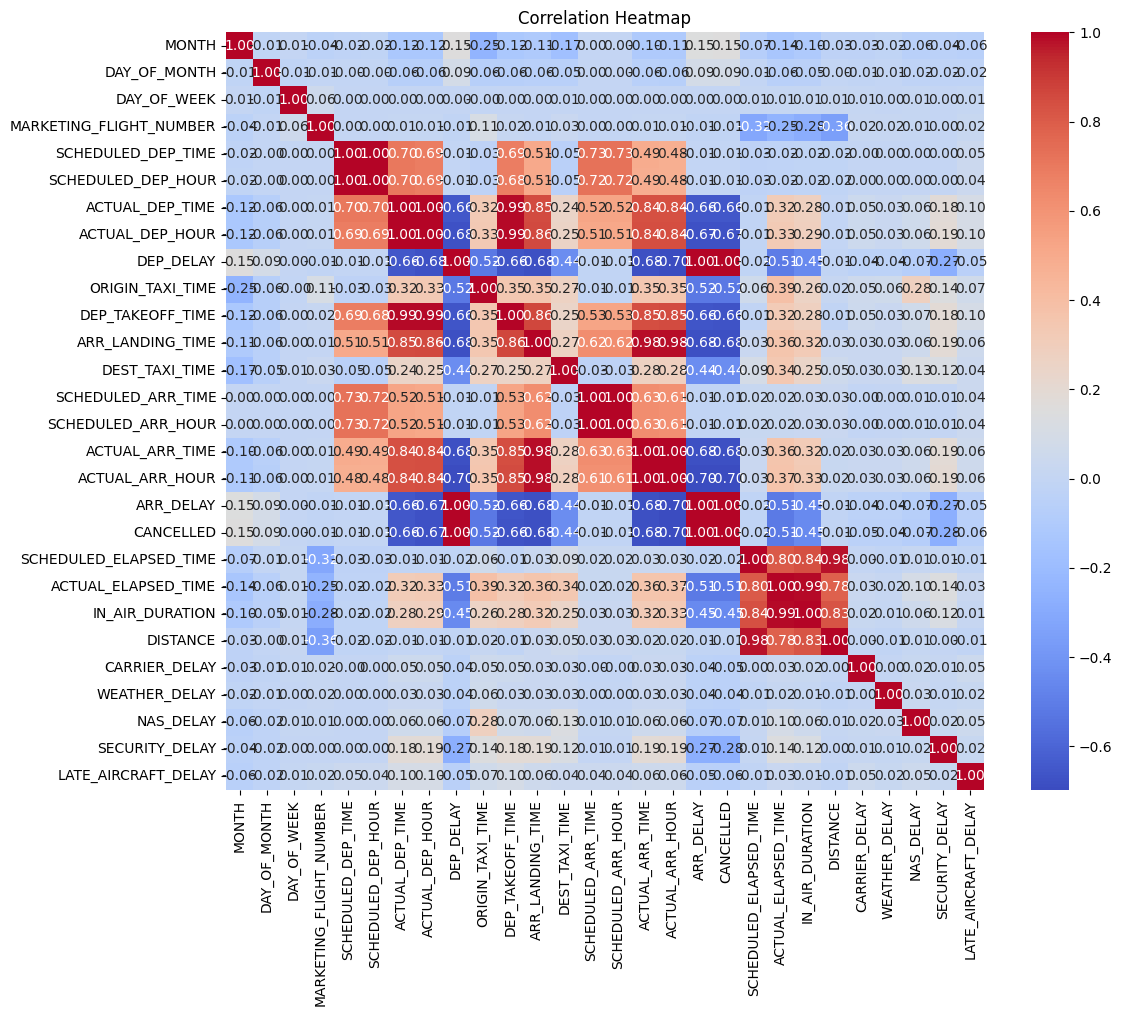

In [43]:
print("=== 5. Displaying Correlation Heatmap ===\n")
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
print("\n")

# FILING

In [44]:
# ----- SAVE TO CSV -----
csv_df = pd.DataFrame(csv_results, columns=["Column A", "Column B", "Test", "Result", "Inference"])
csv_path = "testing_results.csv"
csv_df.to_csv(csv_path, index=False)
print(f"Detailed test results written to '{csv_path}'\n")

# ----- WRITE TXT SUMMARY -----
txt_lines = [
    "SUMMARY OF TESTING RESULTS\n",
    "Normal Columns:           " + (", ".join(normal_columns)     if normal_columns     else "None"),
    "Non-Normal Columns:       " + (", ".join(non_normal_columns) if non_normal_columns else "None"),
    "Columns with Outliers:    " + (", ".join(outlier_columns)    if outlier_columns    else "None"),
    "Strongly Correlated Pairs:" + (", ".join(strong_corr_pairs)  if strong_corr_pairs  else "None"),
    "Chi-Square Associated Pairs:" + (", ".join(chi_assoc_pairs)  if chi_assoc_pairs   else "None")
]

txt_path = "testing_summary.txt"
with open(txt_path, "w") as f:
    f.write("\n".join(txt_lines))

print(f"Summary of key results written to '{txt_path}'\n")

Detailed test results written to 'testing_results.csv'

Summary of key results written to 'testing_summary.txt'



# Last Execution

In [45]:
get_current_datetime()

'2025-06-02 03:19:49'

In [46]:
# Capture end time
end_time = datetime.now()

# Compute time difference
diff = end_time - start_time

# Total seconds (float)
total_seconds = diff.total_seconds()

# Decompose
hours, rem = divmod(total_seconds, 3600)
minutes, rem = divmod(rem, 60)
seconds = int(rem)
milliseconds = diff.microseconds // 1000

# Display
print(f"Start time : {start_time.strftime('%Y-%m-%d %H:%M:%S.%f')}")
print(f"End time   : {end_time.strftime('%Y-%m-%d %H:%M:%S.%f')}")
print(f"Duration   : {int(hours)}h {int(minutes)}m {seconds}s {milliseconds}ms")

Start time : 2025-06-02 03:11:22.283585
End time   : 2025-06-02 03:19:49.777956
Duration   : 0h 8m 27s 494ms
